<a href="https://colab.research.google.com/github/Creator-1523/MachineLearning/blob/main/Asteroids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Features
 
1. SPK-ID: Object primary SPK-ID
2. Object ID: Object internal database ID
3. Object fullname: Object full name/designation
4. pdes: Object primary designation
5. name: Object IAU name
6. NEO: Near-Earth Object (NEO) flag
8. H: Absolute magnitude parameter
9. Diameter: object diameter (from equivalent sphere) km Unit
10. Albedo: Geometric albedo
11. Diameter_sigma: 1-sigma uncertainty in object diameter km Unit
12. Orbit_id: Orbit solution ID
13. Epoch: Epoch of osculation in modified Julian day form
14. Equinox: Equinox of reference frame
15. e: Eccentricity
16. a: Semi-major axis au Unit
17. q: perihelion distance au Unit
18. i: inclination; angle with respect to x-y ecliptic plane
19. tp: Time of perihelion passage TDB Unit
20. moid_ld: Earth Minimum Orbit Intersection Distance au Unit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset.csv",low_memory=False)
df


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [ ]:
df.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [ ]:
df.isnull().sum()/ len(df)*100

id                 0.000000
spkid              0.000000
full_name          0.000000
pdes               0.000000
name              97.698128
prefix            99.998122
neo                0.000417
pha                2.078300
H                  0.653400
diameter          85.789714
albedo            85.905100
diameter_sigma    85.803068
orbit_id           0.000000
epoch              0.000000
epoch_mjd          0.000000
epoch_cal          0.000000
equinox            0.000000
e                  0.000000
a                  0.000000
q                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
ma                 0.000104
ad                 0.000417
n                  0.000000
tp                 0.000000
tp_cal             0.000000
per                0.000417
per_y              0.000104
moid               2.078300
moid_ld            0.013250
sigma_e            2.078404
sigma_a            2.078404
sigma_q            2.078404
sigma_i            2

In [ ]:
df=df.drop(['name','prefix'],axis=1)

In [ ]:
df[df['pha']=='Y'].isnull().sum()

id                   0
spkid                0
full_name            0
pdes                 0
neo                  0
pha                  0
H                    0
diameter          1845
albedo            1866
diameter_sigma    1877
orbit_id             0
epoch                0
epoch_mjd            0
epoch_cal            0
equinox              0
e                    0
a                    0
q                    0
i                    0
om                   0
w                    0
ma                   0
ad                   0
n                    0
tp                   0
tp_cal               0
per                  0
per_y                0
moid                 0
moid_ld              0
sigma_e              0
sigma_a              0
sigma_q              0
sigma_i              0
sigma_om             0
sigma_w              0
sigma_ma             0
sigma_ad             0
sigma_n              0
sigma_tp             0
sigma_per            0
class                0
rms                  0
dtype: int6

In [ ]:
df=df.dropna()

In [ ]:
df

,id,spkid,full_name,pdes,neo,pha,H,diameter,albedo,diameter_sigma,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.40,939.400,0.0900,0.200,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,N,N,4.20,545.000,0.1010,18.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,N,N,5.33,246.596,0.2140,10.594,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,N,N,3.00,525.400,0.4228,0.200,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,N,N,6.90,106.699,0.2740,3.140,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,bK16N07B,3755231,(2016 NB7),2016 NB7,N,N,16.20,3.793,0.0210,1.375,...,2.602600e-05,1.897900e-05,4.951000e-05,5.127900e-05,2.635700e-07,1.878300e-08,3.498100e-04,2.217200e-04,MBA,0.59145
891841,bK16N24W,3755298,(2016 NW24),2016 NW24,N,N,17.40,2.696,0.0610,0.701,...,1.788500e-05,1.538400e-04,3.026900e-03,3.326500e-03,1.472800e-06,1.949700e-07,1.413600e-02,1.198900e-03,MBA,0.42754
894103,bK16P66B,3757444,(2016 PB66),2016 PB66,N,N,17.20,3.271,0.0720,1.074,...,6.736600e-05,1.160600e-04,1.493200e-03,5.880600e-04,2.269800e-06,1.603500e-07,2.675200e-03,1.686400e-03,MBA,0.53016
901055,bK16TB9F,54000016,(2016 TF119),2016 TF119,N,N,16.00,3.009,0.0780,0.981,...,3.376000e-05,2.546000e-05,3.313800e-04,8.637800e-05,9.530100e-07,6.243600e-08,3.265500e-04,7.520900e-04,MBA,0.57294


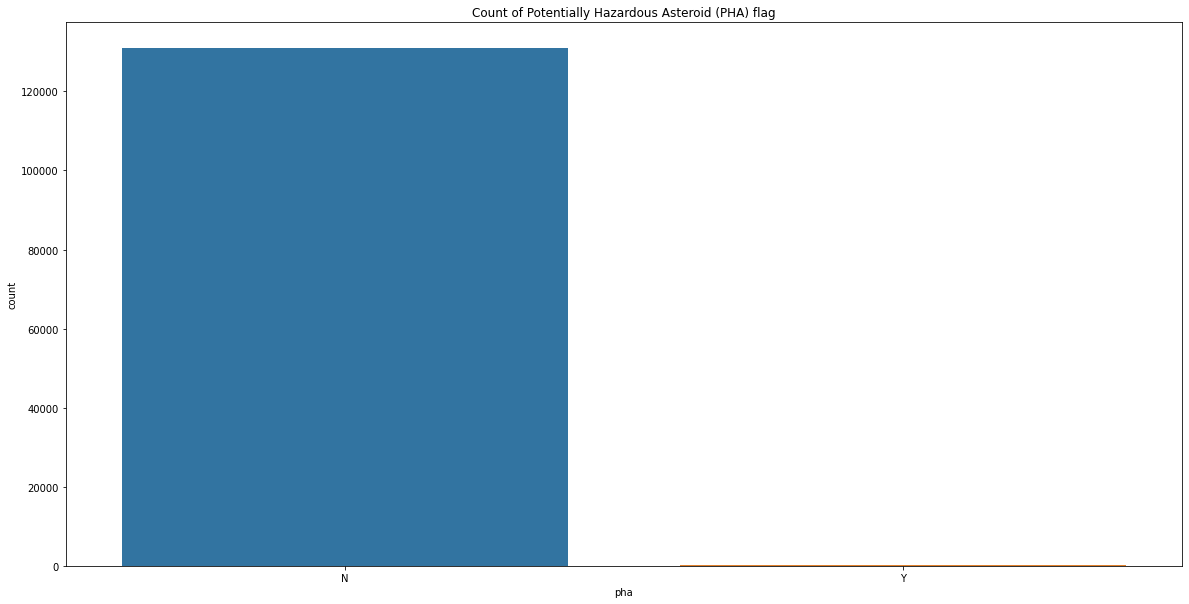

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Count of Potentially Hazardous Asteroid (PHA) flag')
sns.countplot(data=df, x='pha');

In [ ]:
len(df[df['pha'] == 'N'])

130961

In [ ]:
len(df[df['pha'] == 'Y'])

181

In [ ]:
len(df[df['pha'] == 'Y'])/ len(df[df['pha'] == 'N']) * 100

0.13820908514748667

In [ ]:
df['equinox'].unique()

array(['J2000'], dtype=object)

In [ ]:
df = df.drop(['id', 'spkid','full_name', 'equinox','orbit_id','pdes'], axis=1)

In [ ]:
df

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,N,N,3.40,939.400,0.0900,0.200,2458600.5,58600,20190427.0,0.076009,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,N,4.20,545.000,0.1010,18.000,2459000.5,59000,20200531.0,0.229972,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,N,5.33,246.596,0.2140,10.594,2459000.5,59000,20200531.0,0.256936,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,N,3.00,525.400,0.4228,0.200,2458600.5,58600,20190427.0,0.088721,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,N,6.90,106.699,0.2740,3.140,2459000.5,59000,20200531.0,0.190913,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,N,N,16.20,3.793,0.0210,1.375,2459000.5,59000,20200531.0,0.159579,...,2.602600e-05,1.897900e-05,4.951000e-05,5.127900e-05,2.635700e-07,1.878300e-08,3.498100e-04,2.217200e-04,MBA,0.59145
891841,N,N,17.40,2.696,0.0610,0.701,2459000.5,59000,20200531.0,0.074890,...,1.788500e-05,1.538400e-04,3.026900e-03,3.326500e-03,1.472800e-06,1.949700e-07,1.413600e-02,1.198900e-03,MBA,0.42754
894103,N,N,17.20,3.271,0.0720,1.074,2459000.5,59000,20200531.0,0.287894,...,6.736600e-05,1.160600e-04,1.493200e-03,5.880600e-04,2.269800e-06,1.603500e-07,2.675200e-03,1.686400e-03,MBA,0.53016
901055,N,N,16.00,3.009,0.0780,0.981,2459000.5,59000,20200531.0,0.240246,...,3.376000e-05,2.546000e-05,3.313800e-04,8.637800e-05,9.530100e-07,6.243600e-08,3.265500e-04,7.520900e-04,MBA,0.57294


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131142 entries, 0 to 909489
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   neo             131142 non-null  object 
 1   pha             131142 non-null  object 
 2   H               131142 non-null  float64
 3   diameter        131142 non-null  float64
 4   albedo          131142 non-null  float64
 5   diameter_sigma  131142 non-null  float64
 6   epoch           131142 non-null  float64
 7   epoch_mjd       131142 non-null  int64  
 8   epoch_cal       131142 non-null  float64
 9   e               131142 non-null  float64
 10  a               131142 non-null  float64
 11  q               131142 non-null  float64
 12  i               131142 non-null  float64
 13  om              131142 non-null  float64
 14  w               131142 non-null  float64
 15  ma              131142 non-null  float64
 16  ad              131142 non-null  float64
 17  n         

In [ ]:
df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'APO', 'ATE', 'CEN',
       'AST', 'TNO'], dtype=object)

In [ ]:
df['pha'] = df['pha'].map({'Y': 1, 'N': 0})

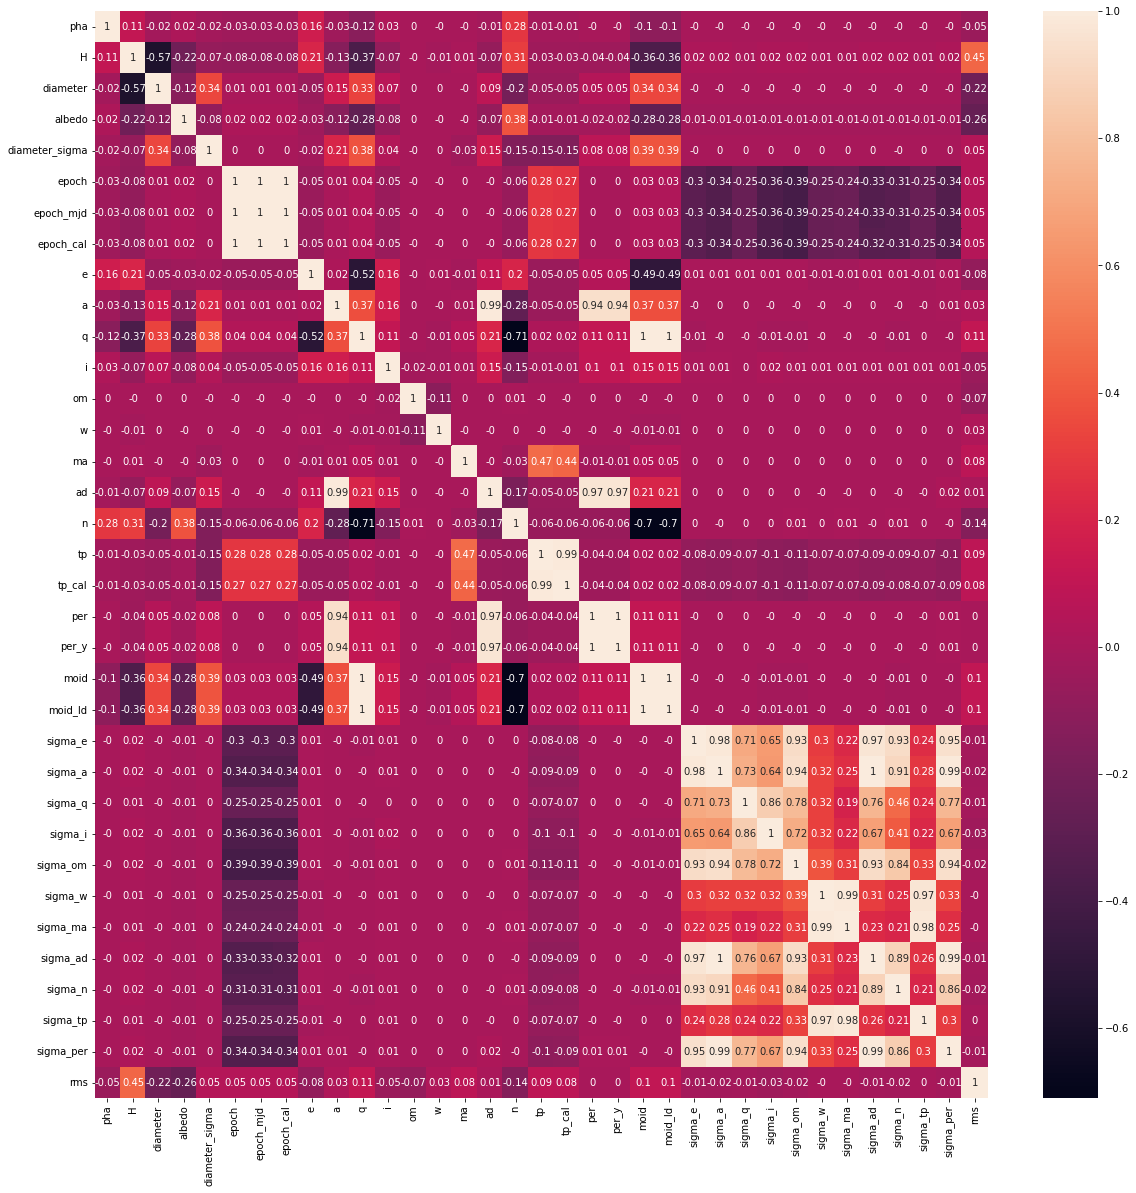

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=round(df.corr(),2), annot=True)

In [ ]:
df= pd.get_dummies(df)

In [ ]:
X = df.drop('pha', axis=1)
y = df['pha']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [ ]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'XGBClassifier': XGBClassifier(),
          'XGBRFClassifier': XGBRFClassifier()}

In [ ]:
baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [ ]:
baseline_model_scores.sort_values('Score')

,Score
KNeighborsClassifier,0.998246
SVC,0.998526
LogisticRegression,0.999339
RandomForestClassifier,0.999847
DecisionTreeClassifier,0.999949
GradientBoostingClassifier,0.999949
AdaBoostClassifier,1.000000
XGBClassifier,1.000000
XGBRFClassifier,1.000000


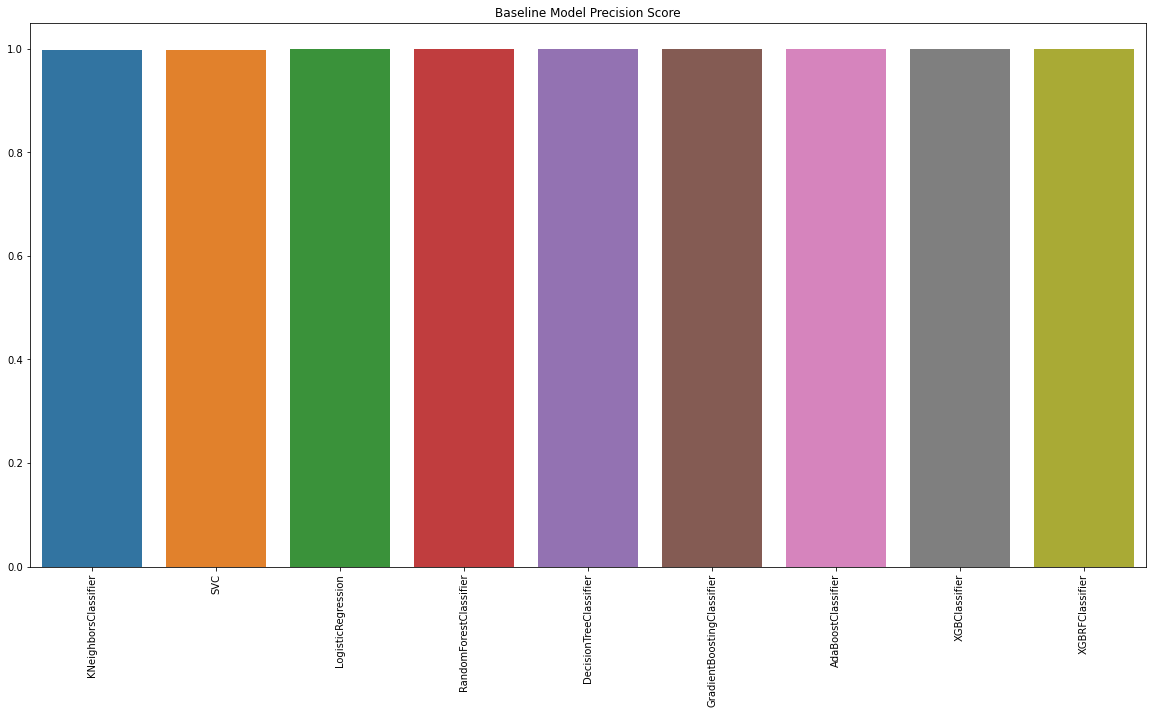

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')
plt.xticks(rotation=90);